## Kelompok 1 PRAKTIKUM KOMUNIKASI DATA DAN JARINGAN KOMPUTER
Nama Anggota: 
Ananda Divana - 2210511053

Arvino Qiyamullail Ramli - 2210511059

Choirunnisa Zalfaa Nabilah  - 2210511070

Kemas Alauddin Riayat Syah I.  - 2210511075

Muhammad Alif Alfattah Riu - 2210511083


Judul : Analisis Deskriptif Deteksi Serangan DDoS dengan Visualisasi 3D
Tujuan : 

- Mengetahui jumlah serangan keseluruhan 
- Mengetahui jumlah tiap serangan
- Mengetahui jumlah serangan per waktu
- Mengetahui IP yang sering melakukan serangan

In [1]:
from scapy.all import *
import scapy.layers.inet as inet
import scapy.utils as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

In [4]:
def packet_data(packetInput : PacketList) -> pd.DataFrame:
    packet_information = {
        'Flow ID': [],
        'Source IP': [],
        'Destination IP': [],
        'Source Port': [],
        'Destination Port': [],
        'Protocol': [],
        'Timestamp': [],
    }

    count = 0

    for packet in packetInput:
        if packet.haslayer(inet.TCP) and packet.haslayer(inet.IP):
            sourceIP = packet[inet.IP].src
            destinationIP = packet[inet.IP].dst
            sourcePort = packet[inet.TCP].sport
            destinationPort = packet[inet.TCP].dport
            protocol = packet[inet.IP].proto
            
            rawTime = str(packet.time).split('.')[0]
            timestamp = time.strftime('%Y/%m/%d %H:%M', time.localtime(int(rawTime)))
            
            packet_information['Flow ID'].append(str(destinationIP) + '-' + str(sourceIP) + '-' + str(destinationPort) + '-' + str(sourcePort) + '-' + str(protocol))
            packet_information['Source IP'].append(sourceIP)
            packet_information['Destination IP'].append(destinationIP)
            packet_information['Source Port'].append(sourcePort)
            packet_information['Destination Port'].append(destinationPort)
            packet_information['Protocol'].append(protocol)
            packet_information['Timestamp'].append(timestamp)
            count += 1
    
    print('Total packets: ', count)
    return pd.DataFrame(packet_information)
    


In [5]:
merge_path = "Datasets\CICDS_Wednesday\MergeWednesday.pcap"
packets = utils.rdpcap(merge_path)
df = packet_data(packets)
df.head(10)

Total packets:  1872696


,Flow ID,Source IP,Destination IP,Source Port,Destination Port,Protocol,Timestamp
0,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
1,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
2,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
3,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
4,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
5,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
6,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
7,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
8,192.168.10.19-185.5.72.153-52047-443-6,185.5.72.153,192.168.10.19,443,52047,6,2017/07/05 19:50
9,185.5.72.153-192.168.10.19-443-52047-6,192.168.10.19,185.5.72.153,52047,443,6,2017/07/05 19:50


In [6]:
def ddos_detect(df: pd.DataFrame) -> pd.DataFrame:
    # Calculate the number of packets per flow
    packet_counts = df.groupby('Flow ID').size().reset_index(name='Packet Count')

    # Identify flows with high packet counts
    high_packet_flows = packet_counts[packet_counts['Packet Count'] > 1000]['Flow ID'].tolist()

    # Add a new column 'Attack' to the dataframe
    df['Label'] = df['Flow ID'].apply(lambda x: 'DDoS' if x in high_packet_flows else 'BENIGN')

    return df

In [7]:
df_attck = ddos_detect(df)
# df_attck.head()
df_attck[df_attck['Label'] == 'DDoS'].head()

,Flow ID,Source IP,Destination IP,Source Port,Destination Port,Protocol,Timestamp,Label
15150,192.168.10.15-172.217.3.110-50622-443-6,172.217.3.110,192.168.10.15,443,50622,6,2017/07/05 19:52,DDoS
15158,192.168.10.15-172.217.3.110-50622-443-6,172.217.3.110,192.168.10.15,443,50622,6,2017/07/05 19:52,DDoS
15161,192.168.10.15-172.217.3.110-50622-443-6,172.217.3.110,192.168.10.15,443,50622,6,2017/07/05 19:52,DDoS
15162,192.168.10.15-172.217.3.110-50622-443-6,172.217.3.110,192.168.10.15,443,50622,6,2017/07/05 19:52,DDoS
15163,192.168.10.15-172.217.3.110-50622-443-6,172.217.3.110,192.168.10.15,443,50622,6,2017/07/05 19:52,DDoS


In [22]:
df_attck["Label"].value_counts()

Label
BENIGN    1801788
DDoS        70908
Name: count, dtype: int64

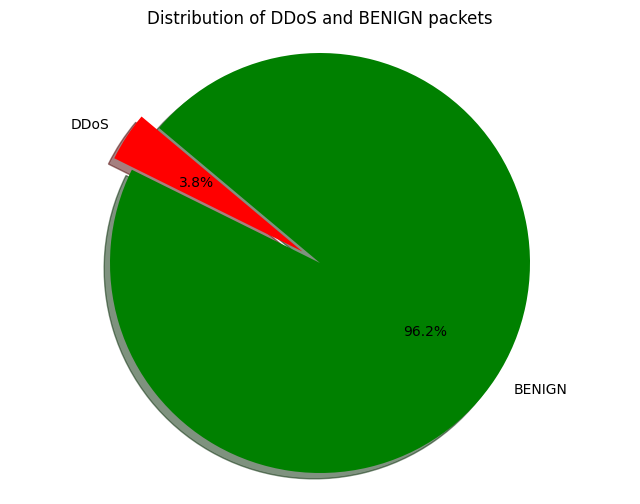

In [9]:
# Menghitung jumlah paket DDoS dan BENIGN
ddos_count = df_attck[df_attck['Label'] == 'DDoS'].shape[0]
benign_count = df_attck[df_attck['Label'] == 'BENIGN'].shape[0]

# Menyiapkan data untuk pie chart
labels = ['DDoS', 'BENIGN']
sizes = [ddos_count, benign_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Menyorot slice 'DDoS'

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of DDoS and BENIGN packets')
plt.axis('equal')  # Agar pie chart terlihat seperti lingkaran

plt.show()


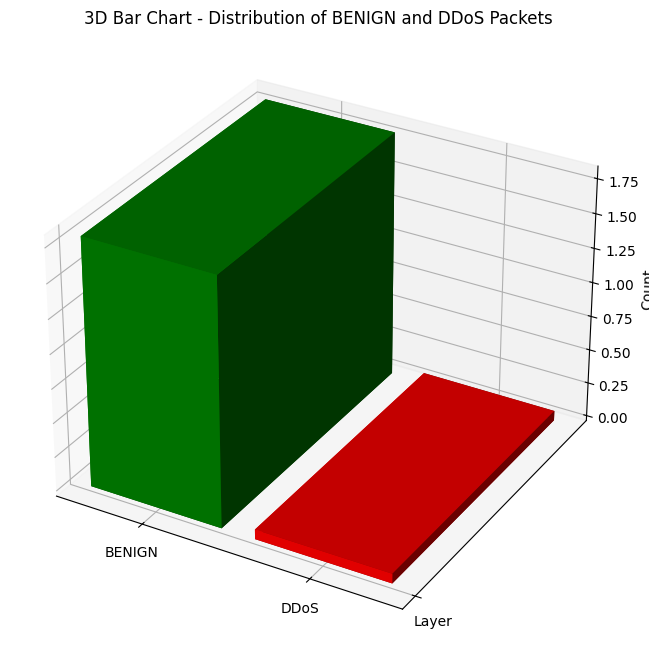

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given label counts
ddos_count = df_attck[df_attck['Label'] == 'DDoS'].shape[0]
benign_count = df_attck[df_attck['Label'] == 'BENIGN'].shape[0]

# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Bar chart data
x_pos = [1, 2]  # X-axis positions for BENIGN and DDoS
y_pos = [1]     # Y-axis position (only one layer in this case)
z_pos = [0]     # Z-axis position (bottom of the bars)

dx = dy = 0.8   # Width of the bars
dz = [benign_count, ddos_count]  # Height of the bars

colors = ['green', 'red']

# Creating 3D bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors)

# Setting labels and title
ax.set_xticks([1.4, 2.4])  # Adjusting x-axis ticks for better alignment
ax.set_xticklabels(['BENIGN', 'DDoS'])
ax.set_yticks([1])
ax.set_yticklabels(['Layer'])
ax.set_zlabel('Count')
ax.set_title('3D Bar Chart - Distribution of BENIGN and DDoS Packets')

plt.show()


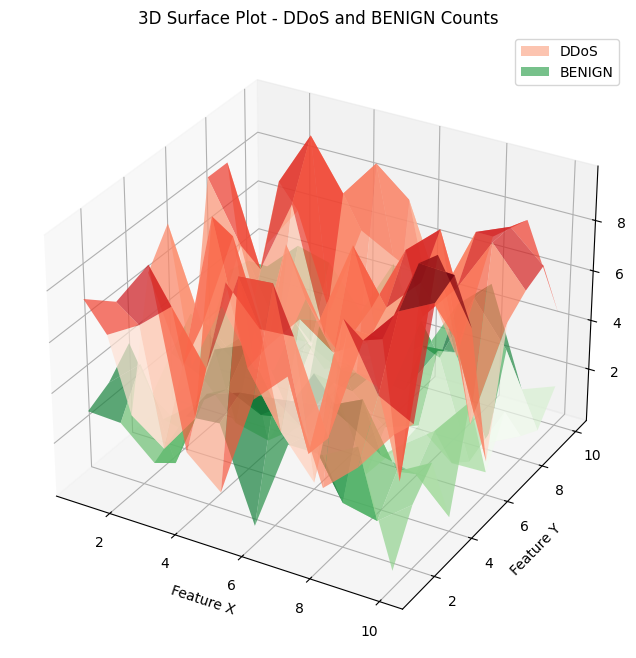

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Given label counts
ddos_count = df_attck[df_attck['Label'] == 'DDoS'].shape[0]
benign_count = df_attck[df_attck['Label'] == 'BENIGN'].shape[0]

# Hypothetical data for three features (replace with your actual data)
X = np.linspace(1, 10, 10)
Y = np.linspace(1, 10, 10)
X, Y = np.meshgrid(X, Y)

# Z represents the counts (replace with your actual counts or values)
Z_DDoS = np.random.rand(10, 10) * 10
Z_BENIGN = np.random.rand(10, 10) * 5

# Creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface for DDoS
ax.plot_surface(X, Y, Z_DDoS, cmap='Reds', label='DDoS', alpha=0.7)

# Plotting the surface for BENIGN
ax.plot_surface(X, Y, Z_BENIGN, cmap='Greens', label='BENIGN', alpha=0.7)

# Setting labels and title
ax.set_xlabel('Feature X')
ax.set_ylabel('Feature Y')
ax.set_zlabel('Count')
ax.set_title('3D Surface Plot - DDoS and BENIGN Counts')

# Adding legend
ax.legend()

plt.show()


In [39]:
df = pd.read_csv("Labels\CICDS_Wednesday.csv")
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,BENIGN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Flow ID            692703 non-null  object
 1    Source IP         692703 non-null  object
 2    Source Port       692703 non-null  int64 
 3    Destination IP    692703 non-null  object
 4    Destination Port  692703 non-null  int64 
 5    Protocol          692703 non-null  int64 
 6    Timestamp         692703 non-null  object
 7    Label             692703 non-null  object
dtypes: int64(3), object(5)
memory usage: 42.3+ MB


In [41]:
label = df[" Label"].unique().tolist()
label.remove('BENIGN')
label

['DoS slowloris',
 'DoS Slowhttptest',
 'DoS Hulk',
 'DoS GoldenEye',
 'Heartbleed']

In [42]:
df_attack = df[df[' Label'] != 'BENIGN']
df_attack.head(10)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Label
6558,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631,192.168.10.50,80,6,5/7/2017 2:24,DoS slowloris
26700,172.16.0.1-192.168.10.50-49631-80-6,172.16.0.1,49631,192.168.10.50,80,6,5/7/2017 2:24,DoS slowloris
26701,172.16.0.1-192.168.10.50-49632-80-6,172.16.0.1,49632,192.168.10.50,80,6,5/7/2017 2:24,DoS slowloris
26702,172.16.0.1-192.168.10.50-49633-80-6,172.16.0.1,49633,192.168.10.50,80,6,5/7/2017 2:24,DoS slowloris
26703,172.16.0.1-192.168.10.50-49633-80-6,172.16.0.1,49633,192.168.10.50,80,6,5/7/2017 2:25,DoS slowloris
26704,172.16.0.1-192.168.10.50-53058-80-6,172.16.0.1,53058,192.168.10.50,80,6,5/7/2017 9:01,DoS slowloris
26705,172.16.0.1-192.168.10.50-53692-80-6,172.16.0.1,53692,192.168.10.50,80,6,5/7/2017 9:48,DoS slowloris
26706,172.16.0.1-192.168.10.50-53690-80-6,172.16.0.1,53690,192.168.10.50,80,6,5/7/2017 9:48,DoS slowloris
26707,172.16.0.1-192.168.10.50-53688-80-6,172.16.0.1,53688,192.168.10.50,80,6,5/7/2017 9:48,DoS slowloris
26708,172.16.0.1-192.168.10.50-53686-80-6,172.16.0.1,53686,192.168.10.50,80,6,5/7/2017 9:48,DoS slowloris


In [43]:
df_attack[" Label"].value_counts()

 Label
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

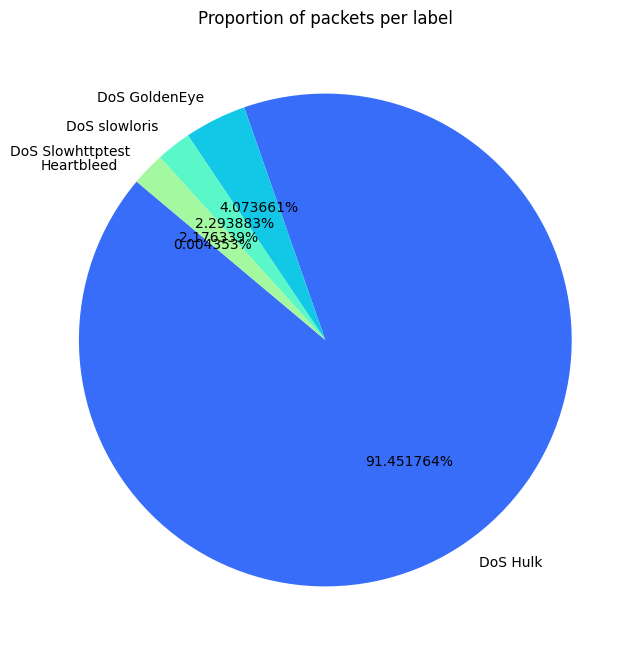

In [44]:
# Hitung jumlah setiap nilai dalam kolom 'Label'
label_counts = df_attack[' Label'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 8))
label_counts.plot(kind='pie', colors=sns.color_palette('rainbow'), startangle=140, autopct='%f%%')
plt.title('Proportion of packets per label')
plt.ylabel('')  # Menghilangkan label pada sumbu y
plt.show()

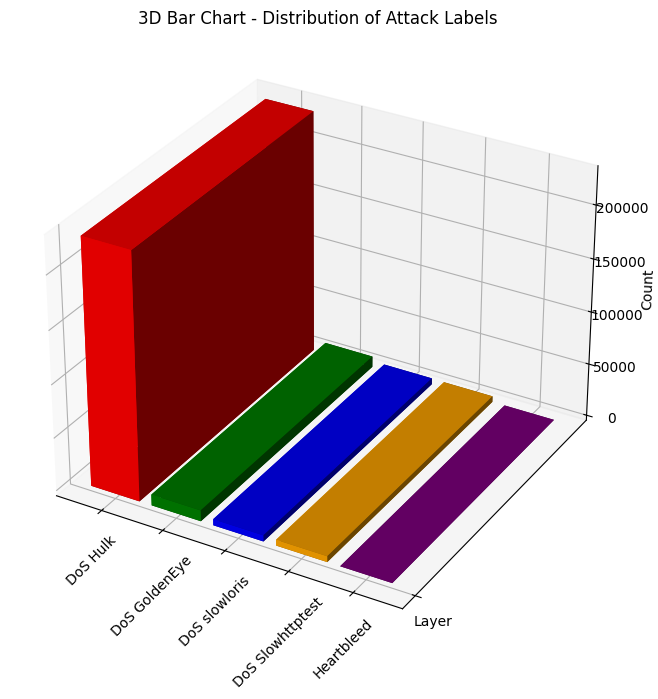

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_attack is already defined

# Calculate the count of each attack label
label_counts = df_attack[" Label"].value_counts()

# Creating a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Bar chart data
x_pos = range(len(label_counts))
y_pos = [1]  # Y-axis position (only one layer in this case)
z_pos = [0]  # Z-axis position (bottom of the bars)

dx = dy = 0.8  # Width and depth of the bars
dz = label_counts.values  # Height of the bars

colors = ['red', 'green', 'blue', 'orange', 'purple']  # You can customize the colors

# Creating 3D bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors)

# Setting labels and title
ax.set_xticks([i + 0.4 for i in x_pos])  # Adjusting x-axis ticks for better alignment
ax.set_xticklabels(label_counts.index, rotation=45)
ax.set_yticks(y_pos)
ax.set_yticklabels(['Layer'])
ax.set_zlabel('Count')
ax.set_title('3D Bar Chart - Distribution of Attack Labels')

plt.show()
